# An interactive notebook with the FRB/US model
This notebook is based on the the FRB/US model packages located here https://www.federalreserve.gov/econres/us-models-package.htm. The packages provides an Eviews https://www.eviews.com/ implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

You can experiment with the model using a simple interactive interface. 

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values. 
This notebook implement the **VAR** flavour.

The tool used is highly experimental and the results are purely for illustration. 

You can run each cell by pressing the run tool or shift+enter
To run all cells use select cell/run all in the menu bar. 

# Import Python libraries

In [1]:
%matplotlib inline

import pandas as pd
from numba import jit

from modelclass import model  

# Prepare some stuff

In [2]:
turbo = 1  # Determines if the the model is compiled or not 

# define af function which is in Eviews but not in Python
@jit("f8(b1,f8,f8)")
def recode(condition,yes,no):
    '''Function which recratetes the functionality of @recode from eviews ''' 
    return yes if condition else no

# Load the model and the data 
The model and the data has been prepared from the public packagde in a previous step. 

In [3]:
basedf  = pd.read_pickle('frbus/data/baseline.pc')

In [4]:
ffrbus  = open('frbus/model/ffrbusvar.txt','rt').read() 
# print(ffrbus)

# Create a model class instance

In [5]:
mfrbus = model(ffrbus,funks=[recode])

# Run Baseline

In [6]:
res = mfrbus(basedf,'2020q1','2025q4')

## Provide descriptions for the model  

In [7]:
trans = {'XGDPN':'GDP real terms (XGDPN)','RFF':'Federal Funds Rate (RFF)','GFSRPN':'Federal Budget surplus',
        'RFFMIN':'Minimum Fed Funds'}

# Define an interactive input widget

In [8]:
slidedef = {'Initial taylor':                {'var':'RFFINTAY_AERR','value':0.0,'min':-3, 'max':3,'op':'+'},
            'Initial taylor inital impulse': {'var':'RFFINTAY_AERR','value':0.0,'min':-3, 'max':3,'op':'+impulse'},
            'Minimum federal funds':         {'var':'RFFMIN',       'value':0.0,'min':-20,'max':5,'op':'='       ,'step':1.0}
            }
radiodef = {'Monetary policy reaction':
            [['Inertial Taylor rule','DMPINTAY'],
             ['Taylor rule','DMPTAY'],
             ['Taylor rule with unemployment gap','DMPTLR'],
             ['Estimated rule','DMPALT'],
             ['Generalized rule','DMPGEN'],
             ['Exogenous nominal funds rate', 'DMPEX'],
             ['Exogenous real funds rate', 'DMPRR']
            ]
           }
           
checkdef = [('Timing of zero lower bound', 'DMPTRSH' ,True) ]

input = mfrbus.inputwidget('2020q1','2025q4',slidedef=slidedef,checkdef=checkdef,radiodef=radiodef
                   ,showout=True,varpat='RFF XGDPN RFFMIN GFSRPN DMPTRSH',trans=trans)

# Show causal structure (only current year)

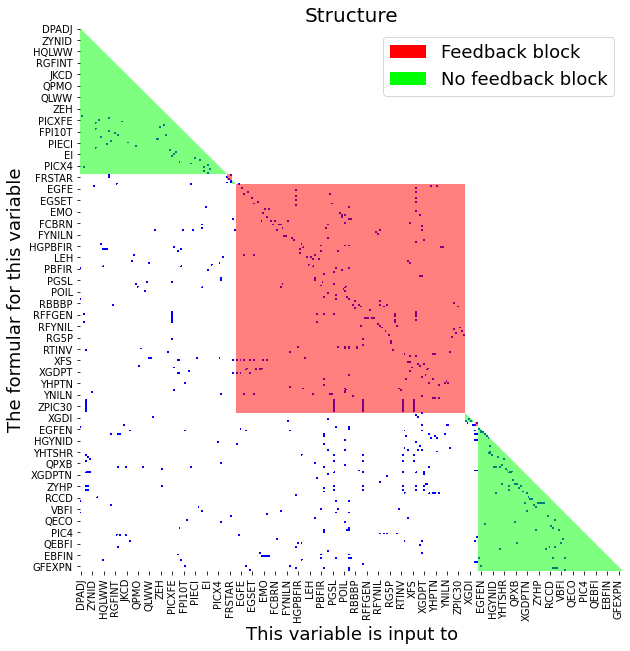

In [9]:
fig   = mfrbus.plotadjacency(size=(10,10))

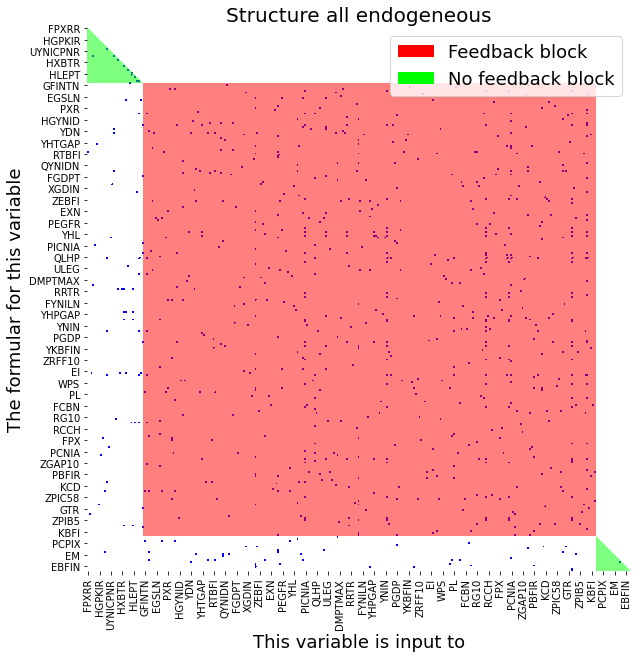

In [10]:
fig   = mfrbus.plotadjacency(size=(10,10),nolag=True,title='Structure all endogeneous')